[Data-set](https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection)

## importing bunch of packages and dataset

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv('/content/Train_data.csv')

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal



## data information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [8]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## EDA

<Axes: xlabel='class'>

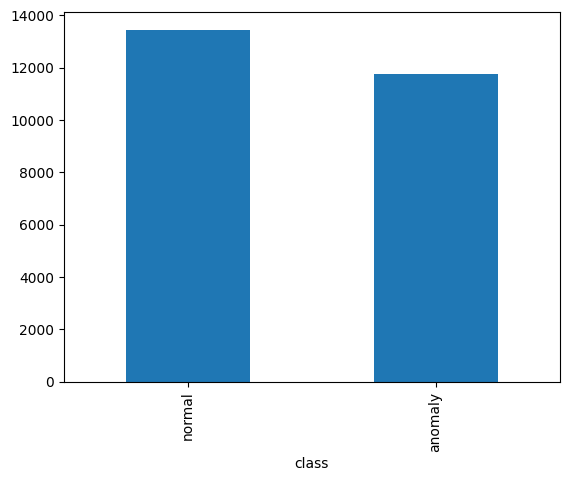

In [9]:
df['class'].value_counts(sort=True).plot(kind='bar')

In [10]:
df['class'].value_counts(sort=True)

class
normal     13449
anomaly    11743
Name: count, dtype: int64

<Axes: xlabel='protocol_type'>

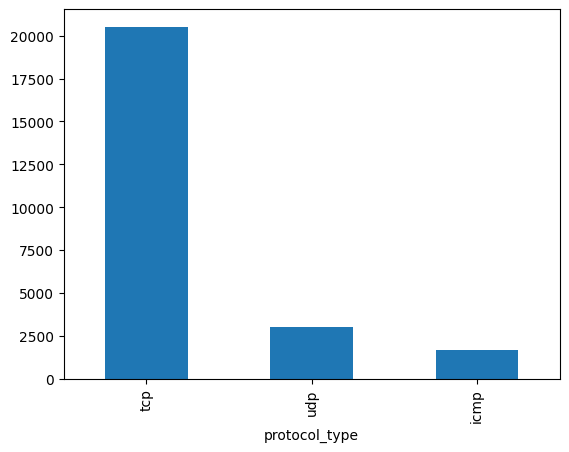

In [11]:
df['protocol_type'].value_counts(sort=True).plot(kind='bar')

<Axes: xlabel='flag'>

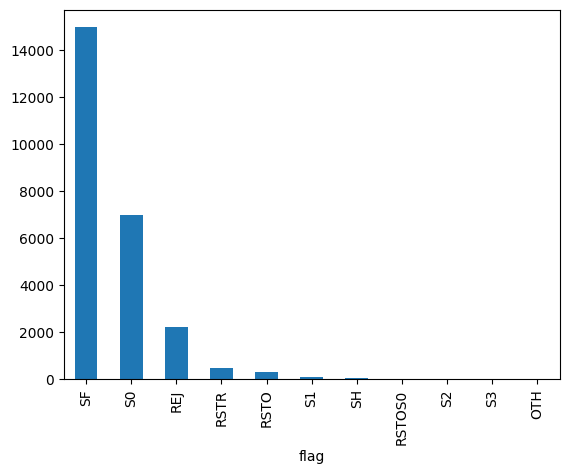

In [12]:
df['flag'].value_counts(sort=True).plot(kind='bar')

## Test and Train Split

In [13]:
from sklearn.model_selection import train_test_split
y= df["class"]
X=df.drop(["class"],axis = 1)
X = X.dropna(axis=1)
X = X.select_dtypes(exclude=['object'])
print("shape of X_train:",X.shape)
print("shape of y_train:",y.shape)

shape of X_train: (25192, 38)
shape of y_train: (25192,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("shape of X_train:",X_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of X_train:",X_test.shape)
print("shape of y_train:",y_test.shape)

shape of X_train: (20153, 38)
shape of y_train: (20153,)
shape of X_train: (5039, 38)
shape of y_train: (5039,)


### important features

In [15]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=1000,n_jobs=-1)
RF.fit(X_train, y_train)
col= list(X_test.columns)
import operator
importances = RF.feature_importances_
features = dict(zip(col, importances))
sorted_features = sorted(features.items(), key=lambda x: x[1], reverse=True)
sorted_features


[('src_bytes', 0.19865764947725176),
 ('dst_bytes', 0.13914467399225092),
 ('diff_srv_rate', 0.06841502364687589),
 ('dst_host_same_srv_rate', 0.06565480256127403),
 ('same_srv_rate', 0.064022015049075),
 ('dst_host_srv_count', 0.0592616178809729),
 ('logged_in', 0.050887421273789674),
 ('count', 0.04792815216748462),
 ('dst_host_same_src_port_rate', 0.037931486187597396),
 ('dst_host_diff_srv_rate', 0.03786027400670229),
 ('dst_host_srv_serror_rate', 0.027973812074359995),
 ('dst_host_srv_diff_host_rate', 0.025632520981392366),
 ('srv_count', 0.02315098786887907),
 ('dst_host_serror_rate', 0.023125760920214917),
 ('srv_serror_rate', 0.020646823274344916),
 ('serror_rate', 0.018388933984100568),
 ('dst_host_count', 0.017545516302750502),
 ('dst_host_rerror_rate', 0.01376173724834486),
 ('dst_host_srv_rerror_rate', 0.012416287614568413),
 ('rerror_rate', 0.009147864313843374),
 ('srv_rerror_rate', 0.009056220811385988),
 ('hot', 0.008882086970565856),
 ('num_compromised', 0.005170481666

## Modeling

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [17]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True,fmt="d", cmap='YlGnBu')
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Train accuracy_score:  0.989877437602342
Train f1_score:  0.9898789155282582
Test accuracy_score:  0.9869021631276047
Test f1_score:  0.9869016189868238
Test confusion_matrix


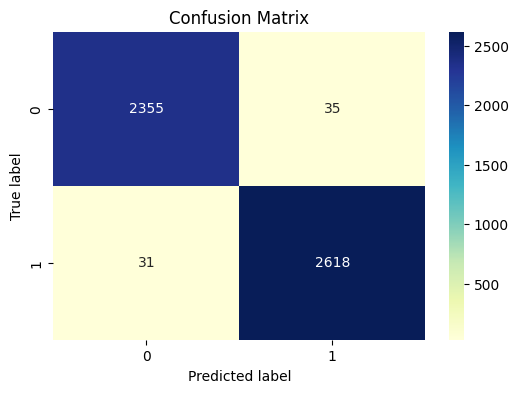

In [18]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predict_train = knn.predict(X_train)
y_predict_test =  knn.predict(X_test)
print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Test f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))
print("Test confusion_matrix")
cm_lr_test = confusion_matrix(y_test, y_predict_test)
draw_confusion_matrix(cm_lr_test)

Logistic Regression Train accuracy_score:  0.8754031657817695
Logistic Regression Train f1_score:  0.875325417372664
Logistic Regression Test accuracy_score:  0.8839055368128597
Logistic Regression Test f1_score:  0.8838052516360726
Logistic Regression Test confusion_matrix


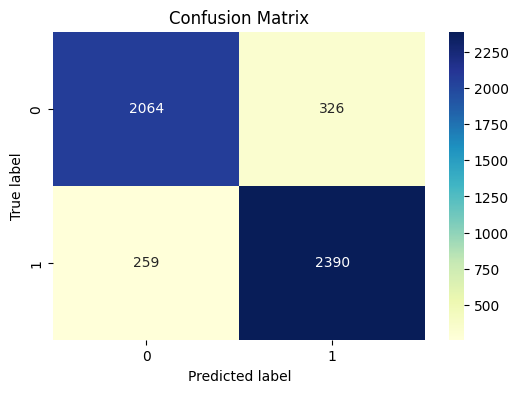

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_train_lr = lr.predict(X_train)
y_predict_test_lr =  lr.predict(X_test)

print("Logistic Regression Train accuracy_score: " ,accuracy_score(y_train, y_predict_train_lr))
print("Logistic Regression Train f1_score: " ,f1_score(y_train, y_predict_train_lr, average='weighted'))
print("Logistic Regression Test accuracy_score: " ,accuracy_score(y_test, y_predict_test_lr))
print("Logistic Regression Test f1_score: " ,f1_score(y_test, y_predict_test_lr, average='weighted'))
print("Logistic Regression Test confusion_matrix")
cm_lr_test = confusion_matrix(y_test, y_predict_test_lr)
draw_confusion_matrix(cm_lr_test)

Gradient Boosting Train accuracy_score:  0.9958318860715526
Gradient Boosting Train f1_score:  0.9958318561757988
Gradient Boosting Test accuracy_score:  0.9944433419329232
Gradient Boosting Test f1_score:  0.9944427515732824
Gradient Boosting Test confusion_matrix


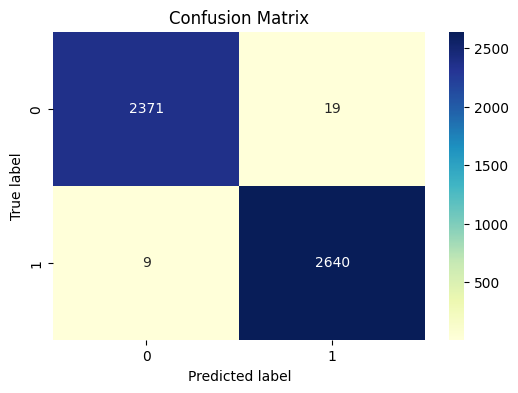

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_predict_train_gb = gb.predict(X_train)
y_predict_test_gb =  gb.predict(X_test)

print("Gradient Boosting Train accuracy_score: " ,accuracy_score(y_train, y_predict_train_gb))
print("Gradient Boosting Train f1_score: " ,f1_score(y_train, y_predict_train_gb, average='weighted'))
print("Gradient Boosting Test accuracy_score: " ,accuracy_score(y_test, y_predict_test_gb))
print("Gradient Boosting Test f1_score: " ,f1_score(y_test, y_predict_test_gb, average='weighted'))
print("Gradient Boosting Test confusion_matrix")
cm_lr_test = confusion_matrix(y_test, y_predict_test_gb)
draw_confusion_matrix(cm_lr_test)

Train accuracy_score:  1.0
Train f1_score:  1.0
Test accuracy_score:  0.9946417940067473
Test f1_score:  0.9946418485938942
Test confusion_matrix


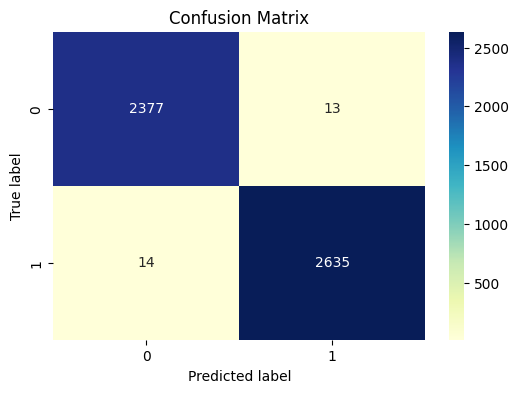

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_predict_train = dt.predict(X_train)
y_predict_test =  dt.predict(X_test)
print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Test f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))
print("Test confusion_matrix")
cm_lr_test = confusion_matrix(y_test, y_predict_test)
draw_confusion_matrix(cm_lr_test)

Train accuracy_score:  1.0
Train f1_score:  1.0
Test accuracy_score:  0.9958325064496923
Test f1_score:  0.9958318298776659
Test confusion_matrix


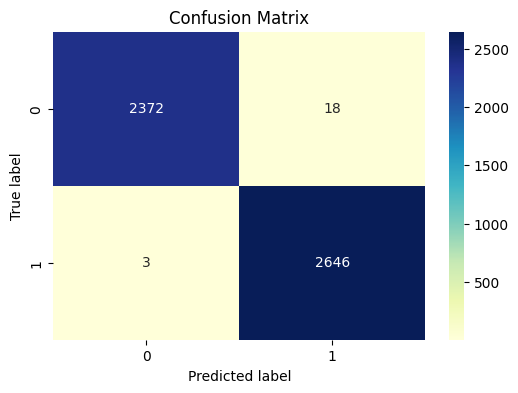

In [22]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier()
RF.fit(X_train, y_train)
y_predict_train = RF.predict(X_train)
y_predict_test =  RF.predict(X_test)

print("Train accuracy_score: " ,accuracy_score(y_train, y_predict_train))
print("Train f1_score: " ,f1_score(y_train, y_predict_train, average='weighted'))
print("Test accuracy_score: " ,accuracy_score(y_test, y_predict_test))
print("Test f1_score: " ,f1_score(y_test, y_predict_test, average='weighted'))
print("Test confusion_matrix")
cm_lr_test = confusion_matrix(y_test, y_predict_test)
draw_confusion_matrix(cm_lr_test)

In [23]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

XGBoost Train accuracy_score:  1.0
XGBoost Train f1_score:  1.0
XGBoost Test accuracy_score:  0.9970232188926375
XGBoost Test f1_score:  0.9970229999906248
XGBoost Test confusion_matrix


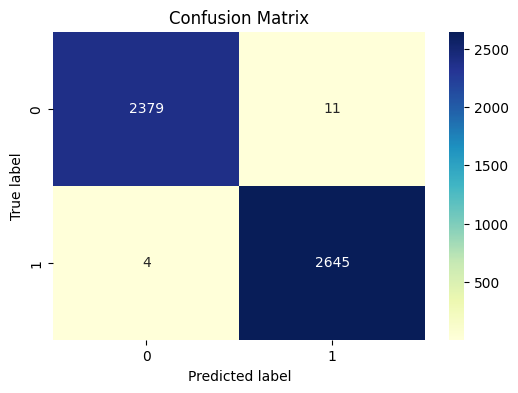

In [24]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)
y_predict_train_xgb = xgb.predict(X_train)
y_predict_test_xgb =  xgb.predict(X_test)

print("XGBoost Train accuracy_score: " ,accuracy_score(y_train_encoded, y_predict_train_xgb))
print("XGBoost Train f1_score: " ,f1_score(y_train_encoded, y_predict_train_xgb, average='weighted'))
print("XGBoost Test accuracy_score: " ,accuracy_score(y_test_encoded, y_predict_test_xgb))
print("XGBoost Test f1_score: " ,f1_score(y_test_encoded, y_predict_test_xgb, average='weighted'))
print("XGBoost Test confusion_matrix")
cm_lr_test = confusion_matrix(y_test_encoded, y_predict_test_xgb)
draw_confusion_matrix(cm_lr_test)

In [25]:
import joblib

filename = 'model.sav'
joblib.dump(knn, filename)

['model.sav']